In [62]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import identity_function, sigmoid, softmax, step_function, relu

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = step_function(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = step_function(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

step = list()
accuracy = list()
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

    if i % 1000 == 0:
        step.append(i)
        accuracy.append(float(accuracy_cnt) / len(x))

[[1.31472688e-07 4.38572392e-11 2.35747503e-06 9.29268721e-08
  1.14758286e-09 1.32931658e-10 3.66917600e-13 9.99995557e-01
  5.37972095e-11 1.85949038e-06]
 [1.33923006e-02 3.27989988e-04 7.92168010e-01 9.84336276e-04
  6.13203100e-09 2.54837776e-02 1.65941866e-01 1.94386398e-09
  1.70171105e-03 3.86949829e-11]
 [1.55217094e-15 9.99997866e-01 5.68446247e-07 2.54453827e-07
  2.80325268e-09 4.25191840e-09 2.89702843e-08 3.12752134e-09
  1.27082674e-06 1.57060200e-09]
 [9.99997296e-01 7.95260455e-14 2.21691345e-06 4.50857909e-09
  1.56422607e-11 4.12510955e-07 6.19571095e-08 4.42635421e-09
  3.38014909e-09 5.04437096e-10]
 [1.10752598e-09 4.06525963e-12 3.63960882e-09 8.37009254e-11
  9.99911365e-01 2.72390562e-09 2.16035987e-07 1.54618285e-07
  2.34746241e-08 8.82337315e-05]
 [1.55968296e-16 9.99996798e-01 6.26596903e-08 5.41383863e-07
  1.16926657e-08 6.16542332e-09 5.21402229e-09 1.23709290e-07
  2.41565577e-06 3.55013086e-08]
 [4.53861195e-12 9.48322431e-10 6.47450490e-10 1.18107509e

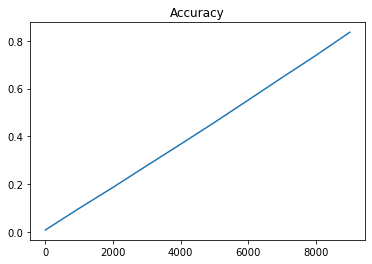

step 1000 : 0.009500
step 2000 : 0.099800
step 3000 : 0.187500
step 4000 : 0.278100
step 5000 : 0.367800
step 6000 : 0.458800
step 7000 : 0.552200
step 8000 : 0.646200
step 9000 : 0.738700
step 10000 : 0.835300


In [61]:
import matplotlib.pyplot as plt

plt.plot(step, accuracy, label="Accuracy")
plt.title("Accuracy")
plt.show()

for i, acc in enumerate(accuracy):
    print("step %d : %f" % ((i+1)*1000, acc))